___

<a href='http://www.pieriandata.com'><img src='../Pierian_Data_Logo.png'/></a>
___
<center><em>Авторские права принадлежат Pierian Data Inc.</em></center>
<center><em>Для дополнительной информации посетите наш сайт <a href='http://www.pieriandata.com'>www.pieriandata.com</a></em></center>

# Проверочный проект по моделям машинного обучения с учителем (supervised learning) - Методы на основе деревьев  - РЕШЕНИЯ



## Этот проверочный проект можно выполнять тремя разными способами - мы обсуждаем это в видео-лекции с обзором проверочных заданий!

----

**Проверочный проект можно выполнять одним из трёх способов:**
   1. Открыть новый блокнот Jupyter Notebook, загрузить данные из файла - и далее самостоятельно выполнить анализ и визуализацию данных, а также создать предиктивную модель.
   2. Использовать блокнот с заданиями как общее руководство к действию, выполняя задания, написанные жирным шрифтом.
   3. Сразу перейти к блокноту с решениями и видео-лекциям с решениями, и параллельно с просмотром лекций выполнять эти задания в своём блокноте.

------
------

## ЦЕЛЬ: Создать модель предсказания того, уйдёт ли абонент в отток (churn).

----
----


## Выполните задания ниже, обозначенные жирным шрифтом!

## Часть 0: Импортируем библиотеки и загружаем данные

**Задание: Запустите уже готовые ячейки ниже, чтобы импортировать библиотеки и загрузить данные из файла в датафрейм. Файл называется "Telco-Customer-Churn.csv"**

In [1]:
# Запустите эти ячейки для начала выполнения проекта!
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../DATA/Telco-Customer-Churn.csv')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Часть 1: Общие характеристики данных

**Задание: С помощью метода .info() проверьте типы данных для колонок, а также есть ли отсутствующие значения в Вашем датафрейме.**

In [4]:
# Напишите Ваш код в этой ячейке


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


**Задание: Выведите статистические метрики для числовых колонок с помощью .describe(). Вы увидите, что большинство колонок являются категориальными, поэтому Вам позднее нужно будет создать для них дамми-переменные.**

In [6]:
# Напишите Ваш код в этой ячейке


In [7]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


# Часть 2:  Исследование данных (Exploratory Data Analysis)

## Исследование признаков

**Задание: Проверьте, что в этих данных нет отсутствующих значений - для этого выведите количество значений NaN отдельно для каждой колонки.**

In [8]:
# Напишите Ваш код в этой ячейке


In [9]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

**Задание: Постройте график CountPlot для проверки сбалансированности значений колонки с классами (Churn).**

In [10]:
# Напишите Ваш код в этой ячейке


<AxesSubplot:xlabel='Churn', ylabel='count'>

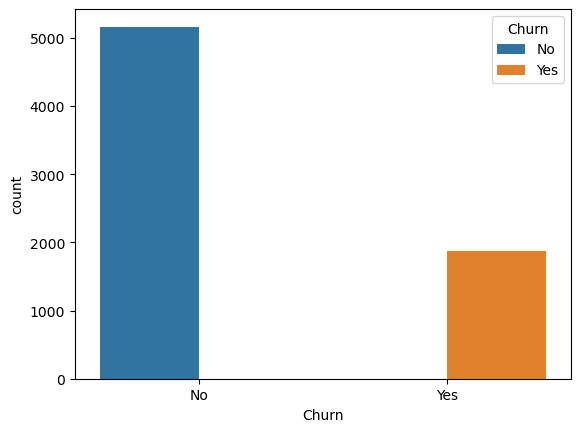

In [11]:
sns.countplot(data=df,x='Churn',hue='Churn')

<img src='fig1.png' >

**Задание: Исследуйте распределение колонки TotalCharges по различным категориям Churn с помощью графика Box Plot или Violin Plot.**

In [12]:
# Напишите Ваш код в этой ячейке


<AxesSubplot:xlabel='Churn', ylabel='TotalCharges'>

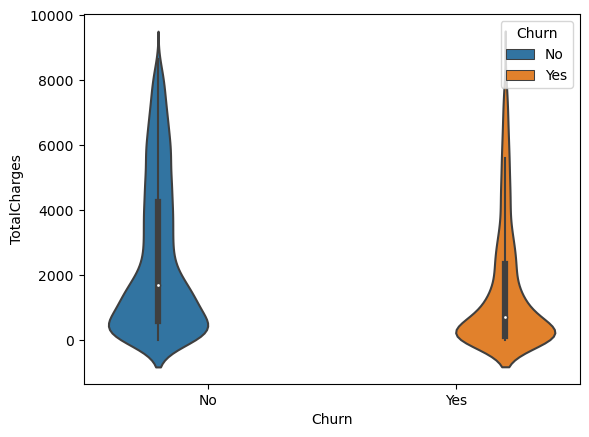

In [13]:
sns.violinplot(data=df,x='Churn',y='TotalCharges',hue='Churn')

<img src='fig2.png' >

**Задание: Постройте график boxplot с распределением колонки TotalCharges для различных типов контрактов, а также добавьте раскраску цветами по колонке Churn.**

In [14]:
# Напишите Ваш код в этой ячейке


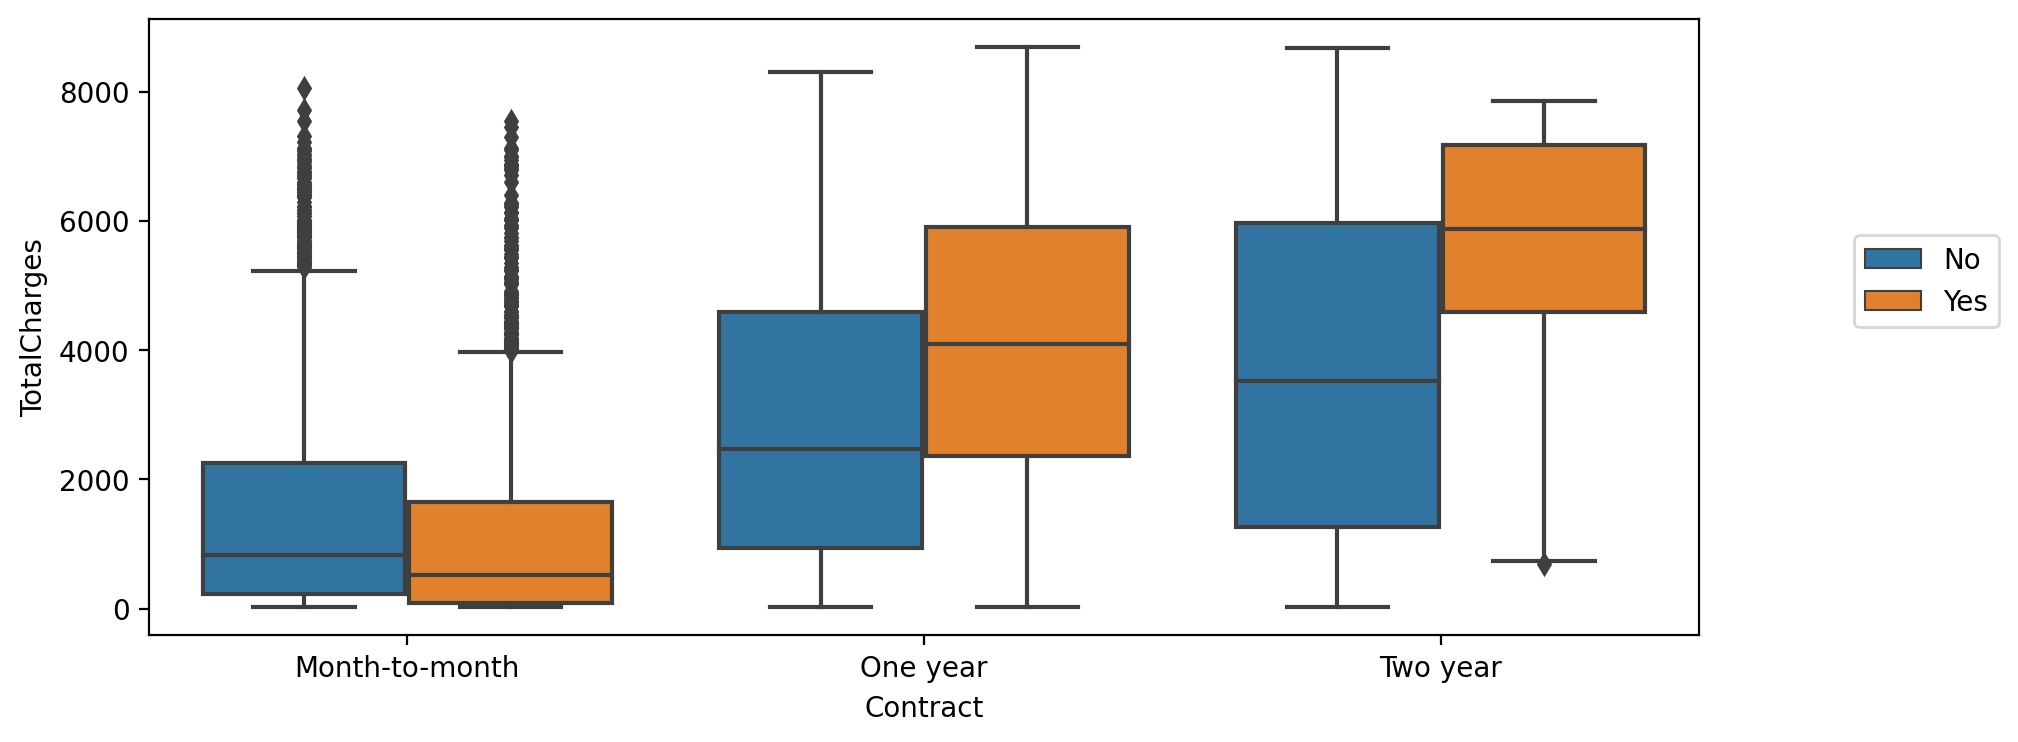

In [15]:
plt.figure(figsize=(10,4),dpi=200)
sns.boxplot(data=df,y='TotalCharges',x='Contract',hue='Churn')
plt.legend(loc=(1.1,0.5))

<img src='fig3.png' >

**Задание: Постройте график barplot с корреляции указанных ниже признаков с целевой переменной. Обратите внимание, что для категориальных признаков сначала нужно сконвертировать их в дамми-переменные, потому что корреляция вычисляется только для числовых колонок.**

    ['gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService', 'MultipleLines', 
     'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'InternetService',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

***Мы специально привели список признаков, чтобы не проверять все признаки. Дело в том, что некоторые признаки имеют слишком много уникальных значений для такого анализа, например колонка customerID.***

In [16]:
# Напишите Ваш код в этой ячейке


In [17]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [18]:
corr_df  = pd.get_dummies(df[['gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport','StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod','Churn']]).corr()

In [19]:
corr_df['Churn_Yes'].sort_values().iloc[1:-1]

Contract_Two year                         -0.301552
StreamingMovies_No internet service       -0.227578
StreamingTV_No internet service           -0.227578
TechSupport_No internet service           -0.227578
DeviceProtection_No internet service      -0.227578
OnlineBackup_No internet service          -0.227578
OnlineSecurity_No internet service        -0.227578
InternetService_No                        -0.227578
PaperlessBilling_No                       -0.191454
Contract_One year                         -0.178225
OnlineSecurity_Yes                        -0.171270
TechSupport_Yes                           -0.164716
Dependents_Yes                            -0.163128
Partner_Yes                               -0.149982
PaymentMethod_Credit card (automatic)     -0.134687
InternetService_DSL                       -0.124141
PaymentMethod_Bank transfer (automatic)   -0.118136
PaymentMethod_Mailed check                -0.090773
OnlineBackup_Yes                          -0.082307
DeviceProtec

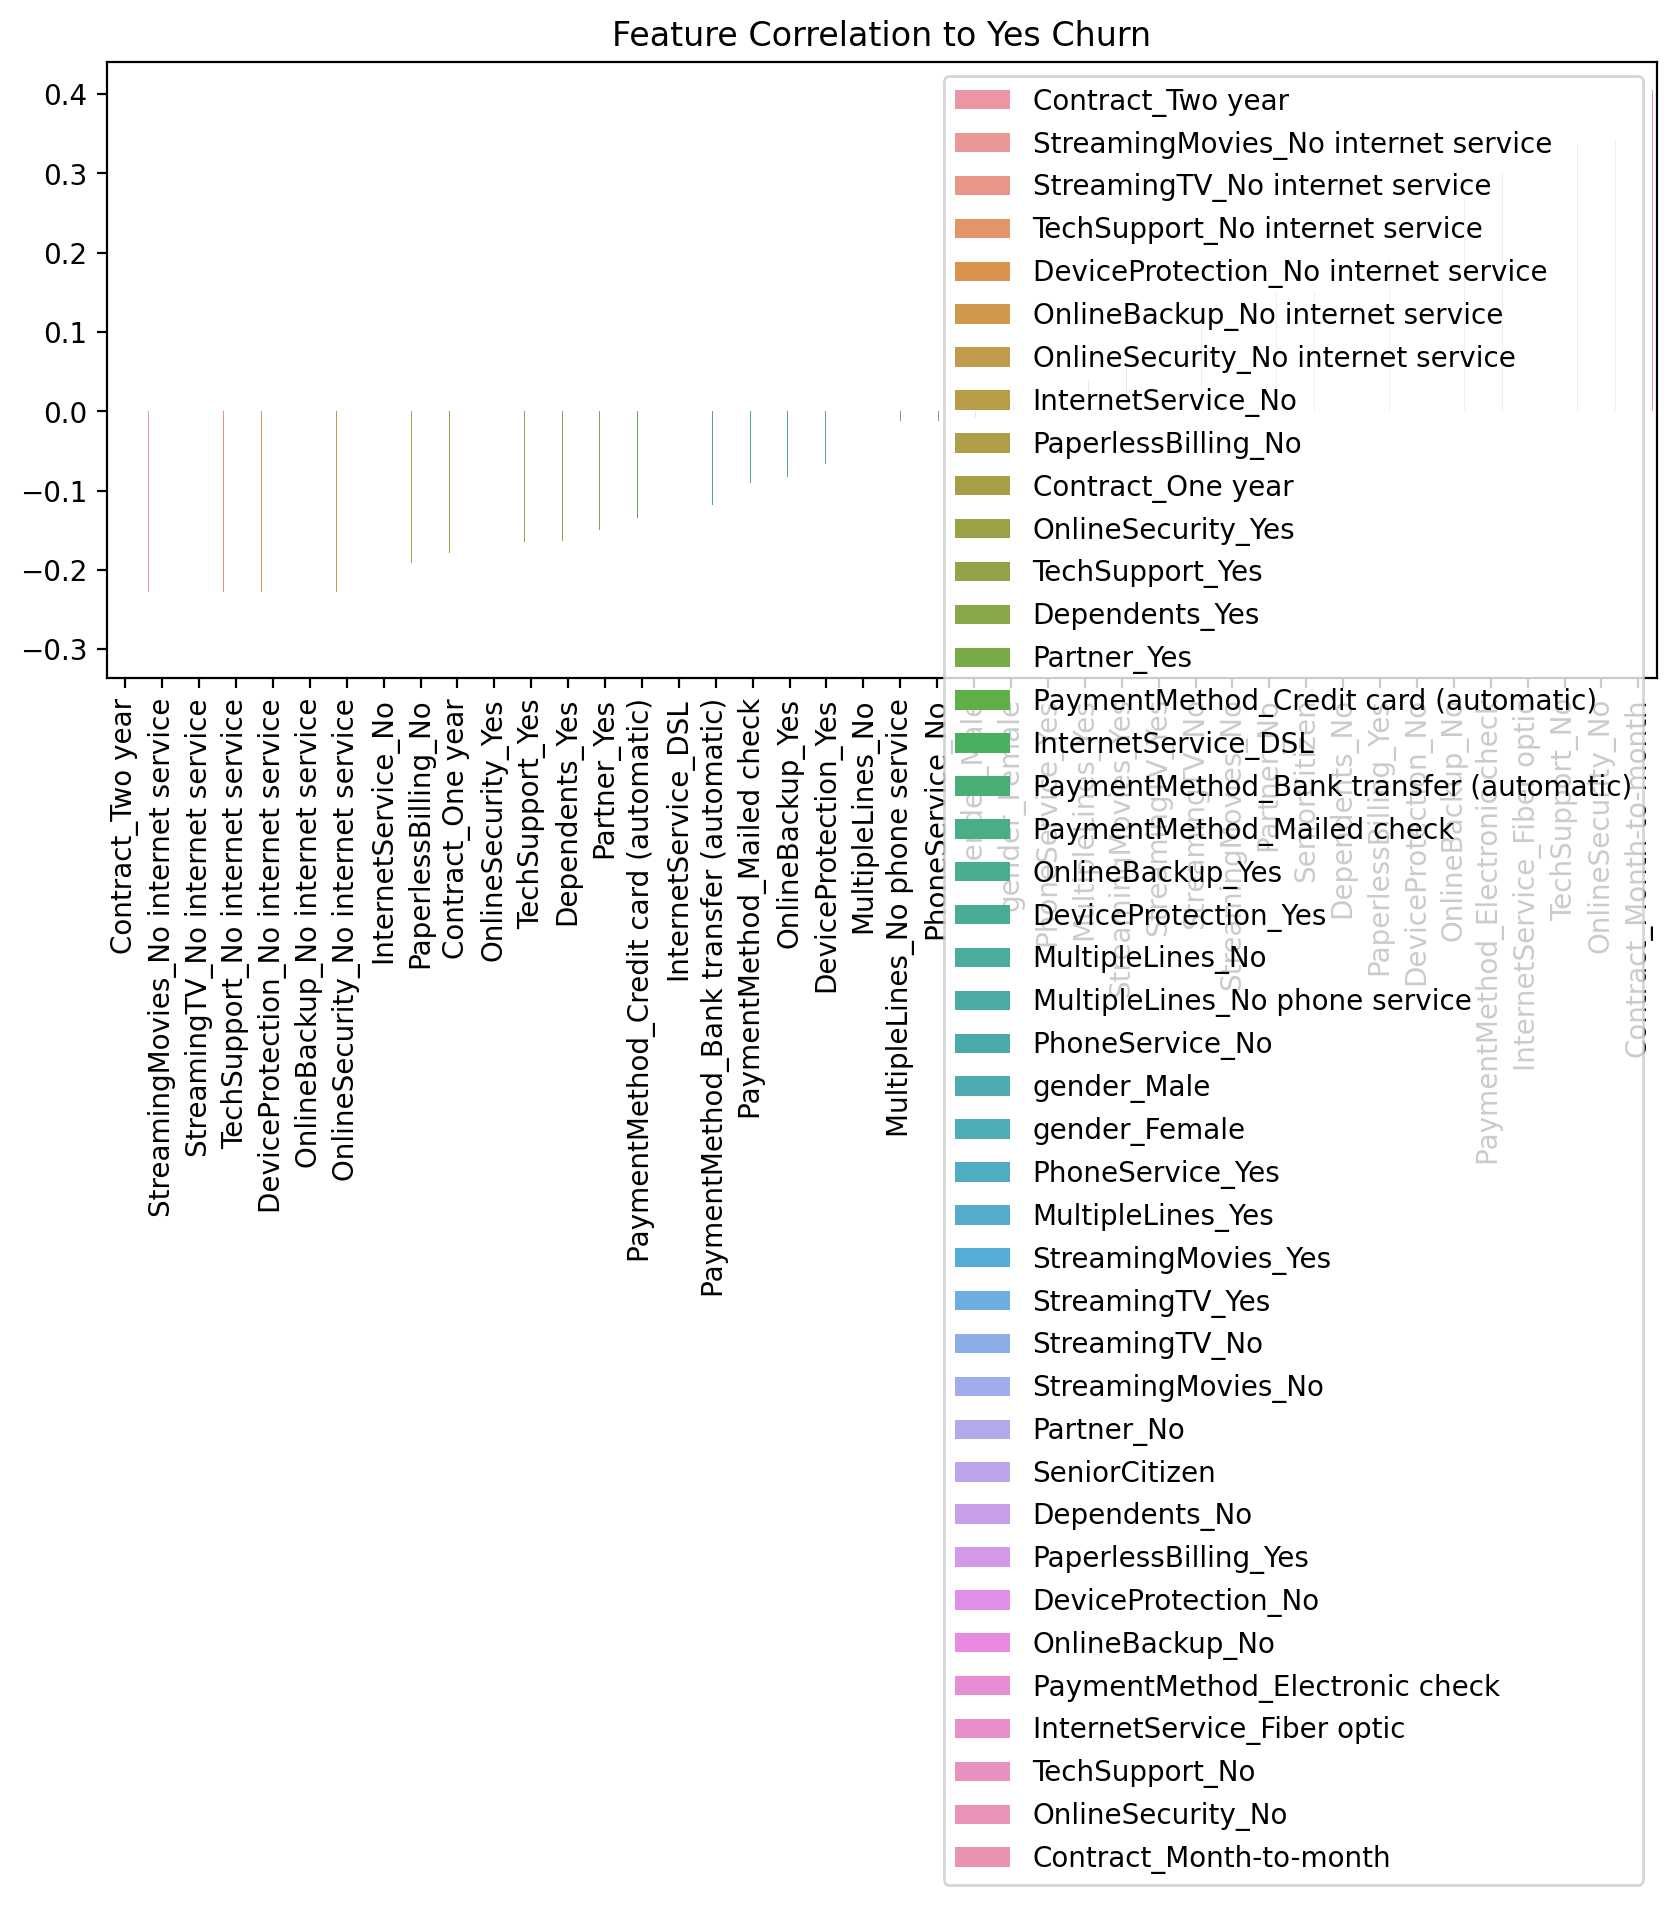

In [20]:
plt.figure(figsize=(10,4),dpi=200)
sns.barplot(x=corr_df['Churn_Yes'].sort_values().iloc[1:-1].index,
            y=corr_df['Churn_Yes'].sort_values().iloc[1:-1].values,
          hue=corr_df['Churn_Yes'].sort_values().iloc[1:-1].index)
plt.title("Feature Correlation to Yes Churn")
plt.xticks(rotation=90);

<img src='figbar.png'>

---
---

# Часть 3: Анализ оттока

**В этих заданиях мы выполним сегментацию абонентов на основе колонки tenure, создавая "когорты" и выполняя сравнение данных между различными когортами.**

**Задание: Перечислите 3 типа контракта (колонка Contract).**

In [21]:
# Напишите Ваш код в этой ячейке


In [22]:
df['Contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

**Задание: Создайте гистограмму с распределением значений колонки tenure - это количество месяцев, сколько времени человек является (или являлся) абонентом компании.**

In [23]:
# Напишите Ваш код в этой ячейке


<AxesSubplot:xlabel='tenure', ylabel='Count'>

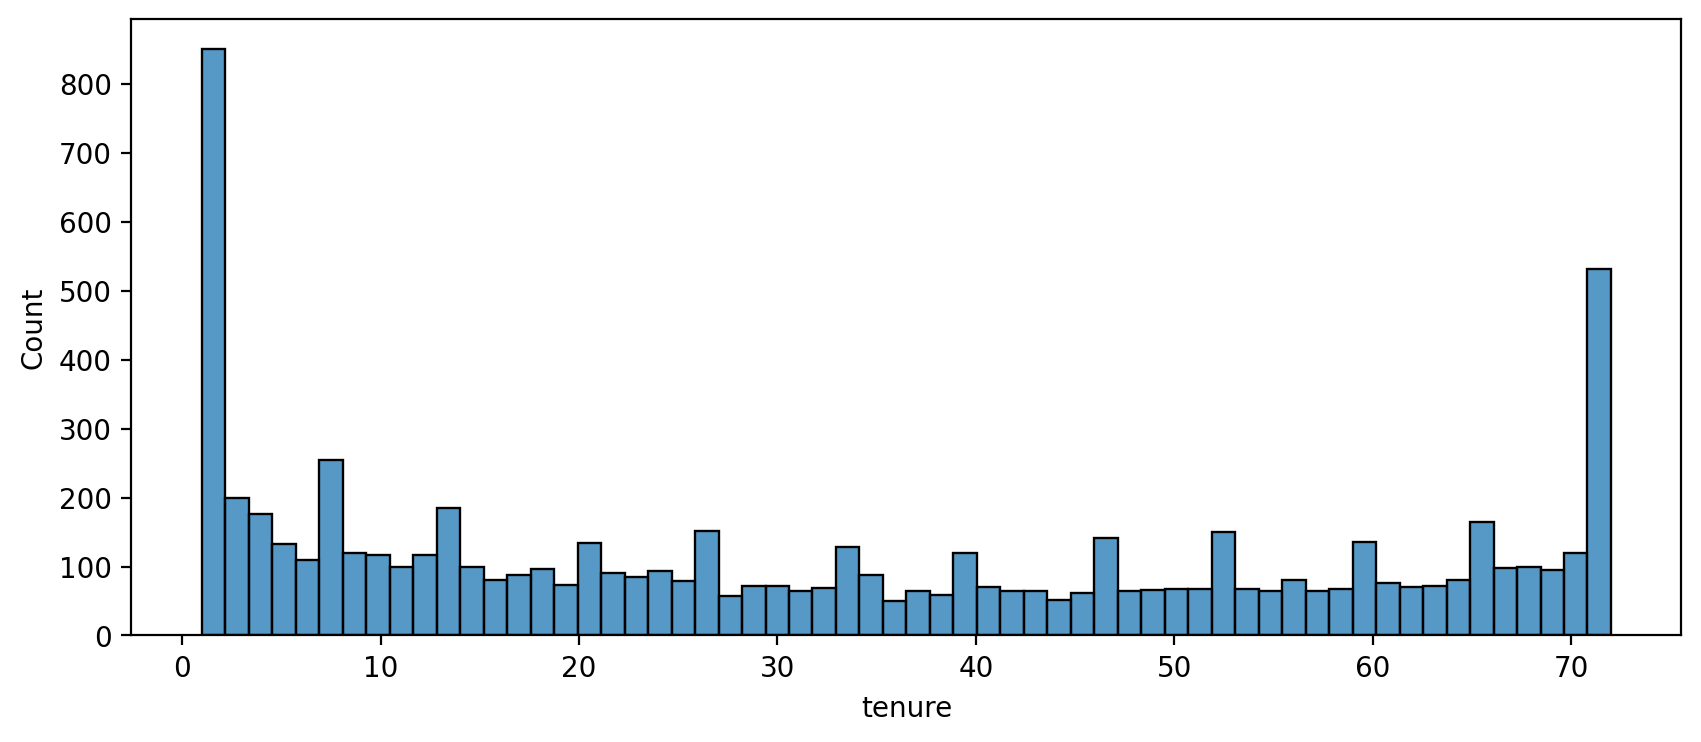

In [24]:
plt.figure(figsize=(10,4),dpi=200)
sns.histplot(data=df,x='tenure',bins=60)

<img src="fig5.png">

**Задание: Постройте гистограммы для колонки tenure, разбивая данные по двум колонкам - Churn и Contract. Посмотрите документацию по seaborn или блокноты для раздела про seaborn, чтобы вспомнить, как это делается.**

In [25]:
# Напишите Ваш код в этой ячейке


<Figure size 2000x600 with 0 Axes>

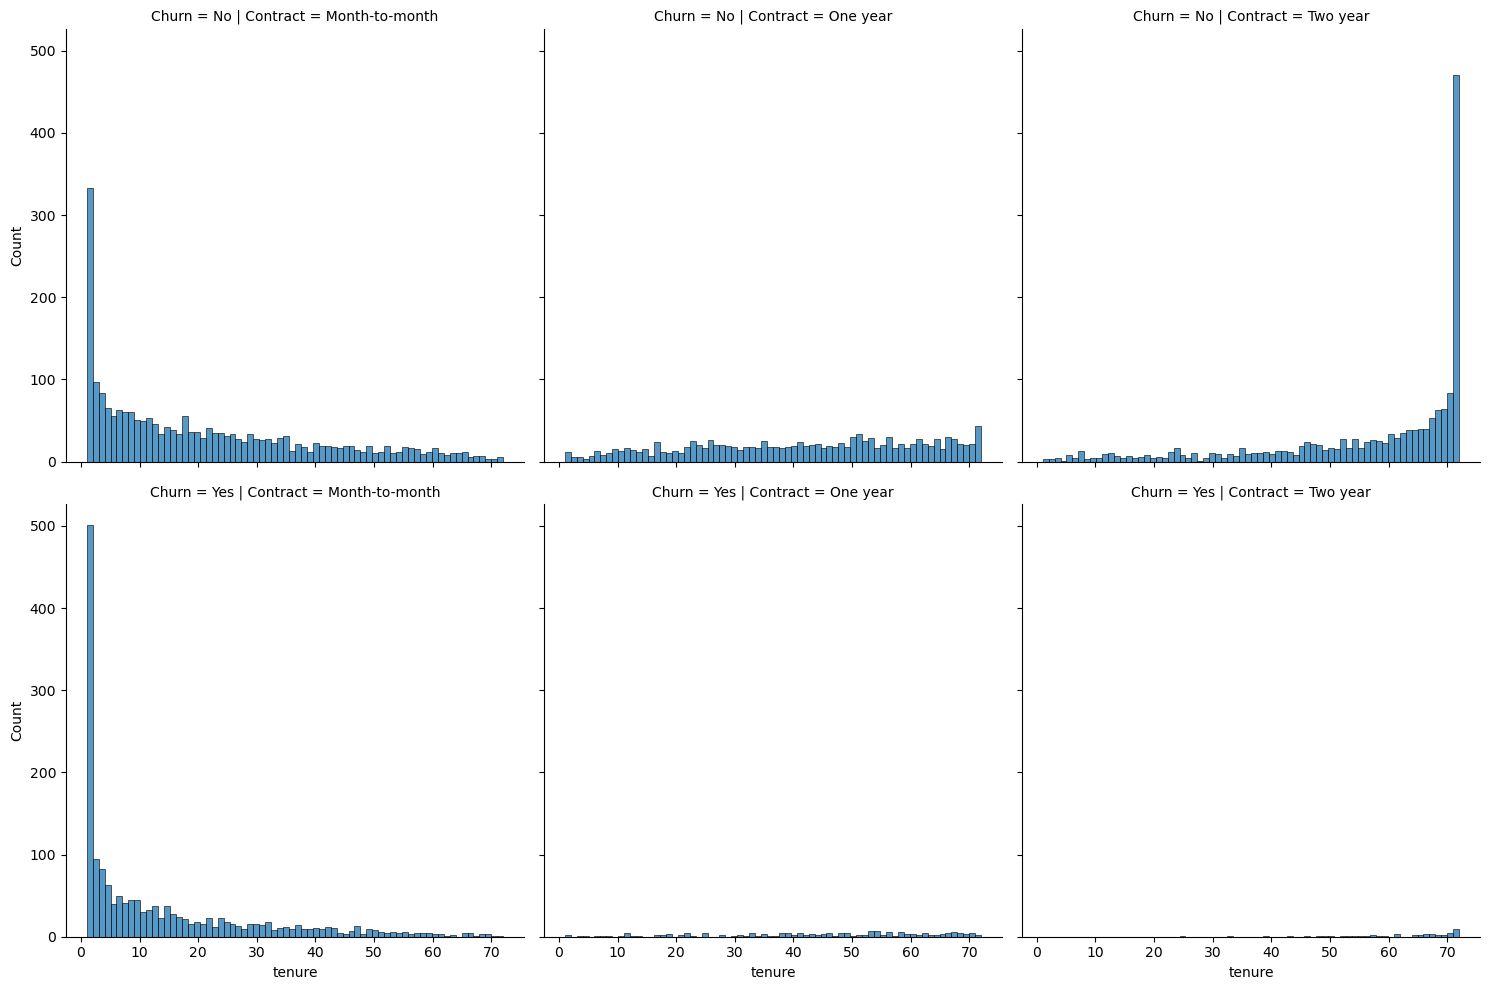

In [26]:
plt.figure(figsize=(10,3),dpi=200)
sns.displot(data=df,x='tenure',bins=70,col='Contract',row='Churn');

<img src="fig6.png">

**Задание: Постройте график scatterplot для колонок Total Charges и Monthly Charges, раскрашивая график цветами по колонке Churn.**

In [27]:
# Напишите Ваш код в этой ячейке


In [28]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

<AxesSubplot:xlabel='MonthlyCharges', ylabel='TotalCharges'>

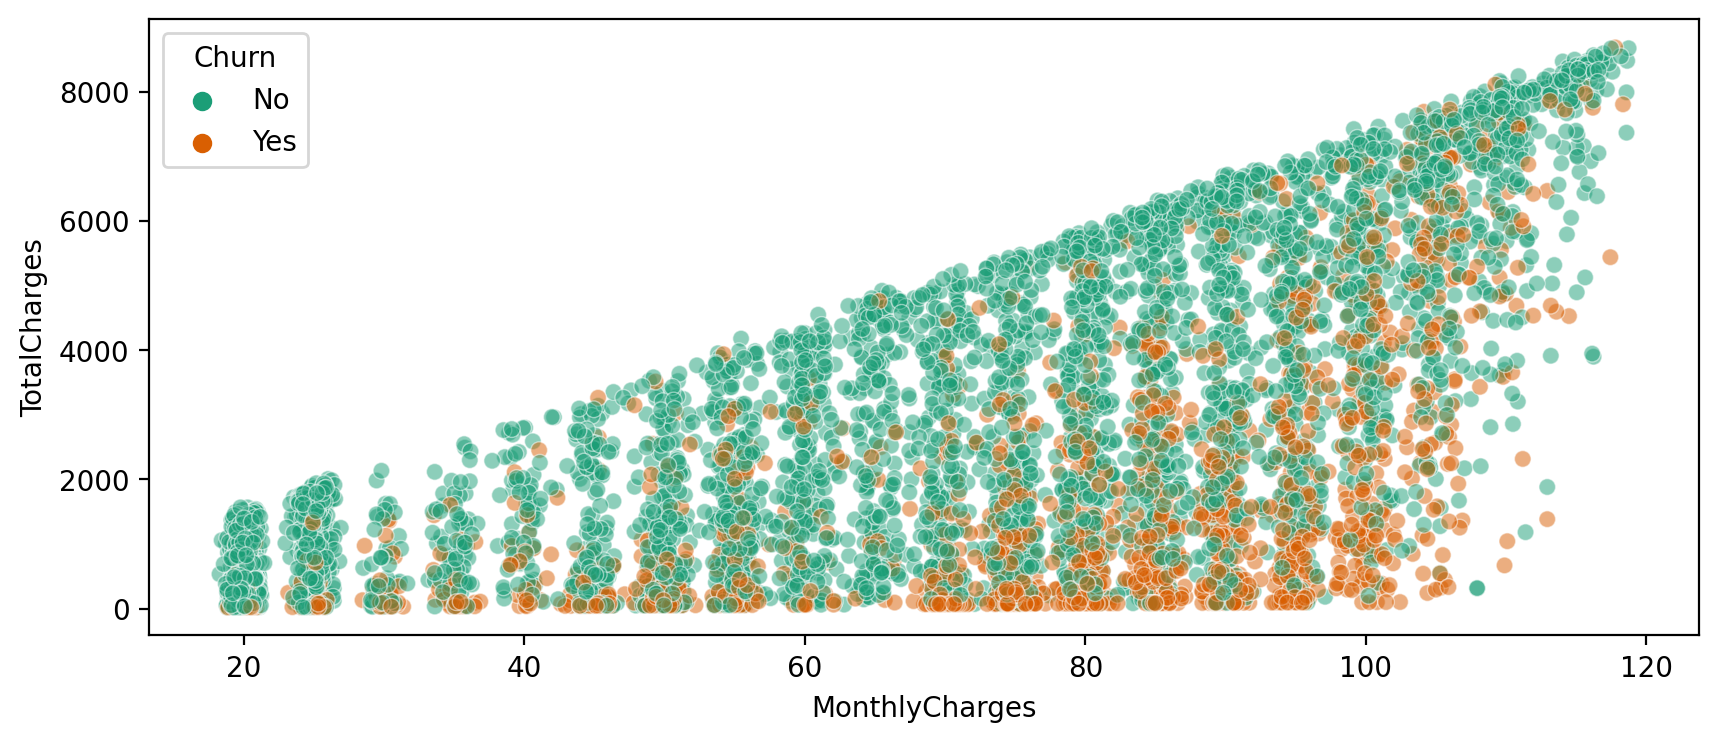

In [29]:
plt.figure(figsize=(10,4),dpi=200)
sns.scatterplot(data=df,x='MonthlyCharges',y='TotalCharges',hue='Churn', linewidth=0.5,alpha=0.5,palette='Dark2')

<img src='fig7.png'>

### Создание когорт (сегментов) по колонке Tenure

**Для начала поместим различные значения tenure (1 месяц, 2 месяца, 3 месяца и так далее) в отдельные когорты (сегменты).**

**Задание: Для каждого уникального значения колонки tenure в качестве когорты, вычислите процент оттока (churn rate) - это количество тех людей, кто ушёл в отток в когорте, как процент от общего количества людей в данной когорте. Вычислите такой процент отдельно для каждой когорты. Например, для когорты с tenure = "1 месяц" должен получиться процент оттока 61.99%. В итоге у Вас должны получиться когорты от 1 до 72 месяцев, и с увеличением количества месяцев уровень оттока должен снижаться. Это разумно, потому что чем дольше человек пользуется услугами компании, тем вероятнее то, что его/её всё устраивает, и он/она продолжит пользоваться этими услугами.**

In [30]:
# Напишите Ваш код в этой ячейке


In [31]:
no_churn = df.groupby(['Churn','tenure']).count().transpose()['No']
yes_churn = df.groupby(['Churn','tenure']).count().transpose()['Yes']

In [32]:
churn_rate = 100 * yes_churn / (no_churn+yes_churn)

In [33]:
churn_rate.transpose()['customerID']

tenure
1     61.990212
2     51.680672
3     47.000000
4     47.159091
5     48.120301
        ...    
68     9.000000
69     8.421053
70     9.243697
71     3.529412
72     1.657459
Name: customerID, Length: 72, dtype: float64

**Задание: Используя результаты предыдущего задания, постройте график процента оттока для различных значений tenure.**

In [34]:
# Напишите Ваш код в этой ячейке


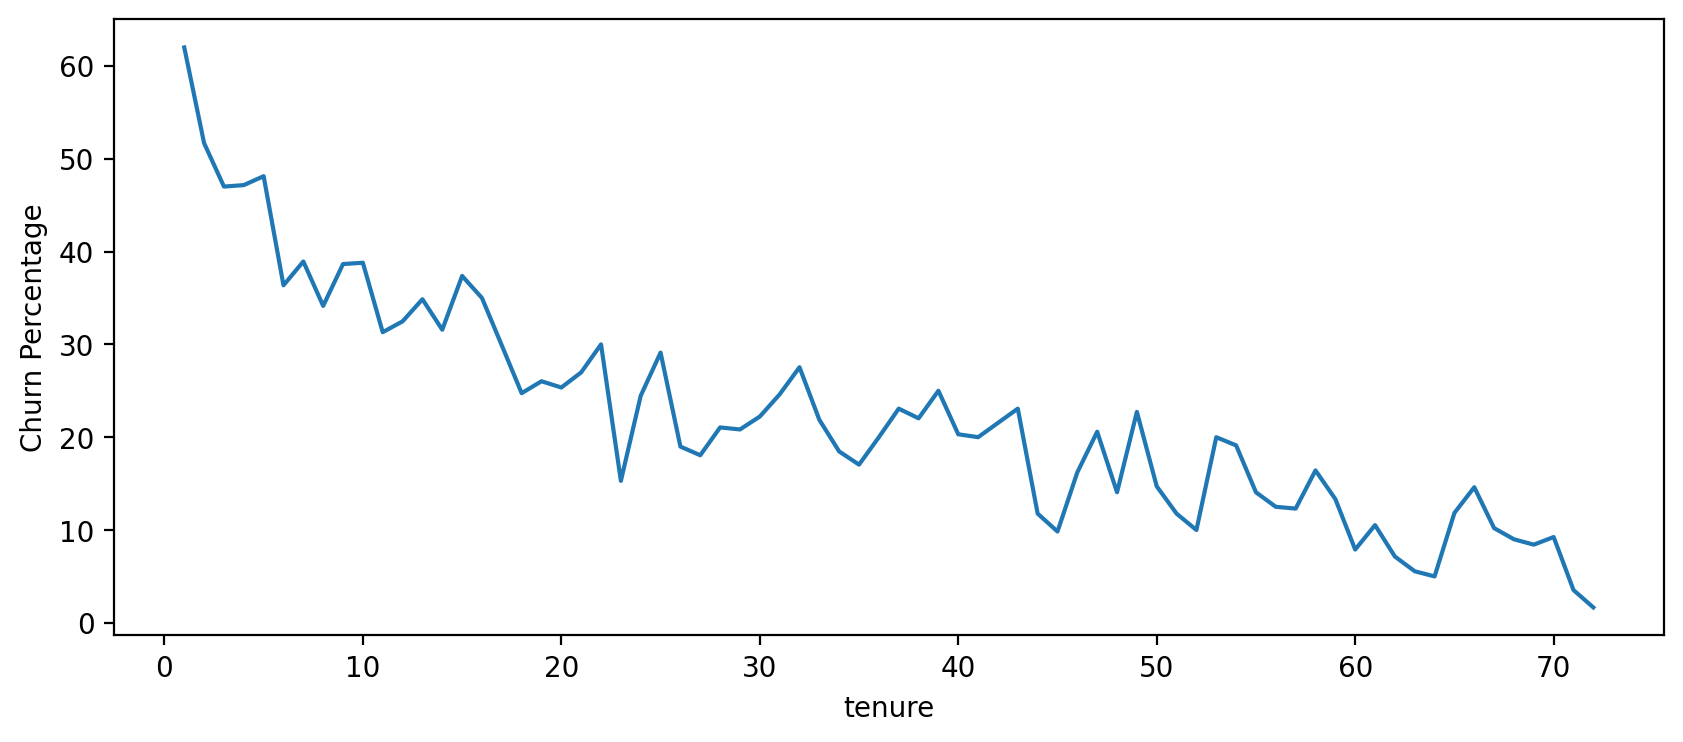

In [35]:
plt.figure(figsize=(10,4),dpi=200)
churn_rate.iloc[0].plot()
plt.ylabel('Churn Percentage');

<img src='fig9.png'>

### Более крупные когорты (сегменты)
**Задание: На основе колонки tenure создайте новую колонку с названием "Tenure Cohort", в которой будут следующие 4 категории:**
   * '0-12 месяцев'
   * '12-24 месяцев'
   * '24-48 месяцев'
   * 'Более 48 месяцев'    

In [36]:
# Напишите Ваш код в этой ячейке


In [37]:
def cohort(tenure):
    if tenure < 13:
        return '0-12 Months'
    elif tenure < 25:
        return '12-24 Months'
    elif tenure < 49:
        return '24-48 Months'
    else:
        return "Over 48 Months"

In [38]:
df['Tenure Cohort'] = df['tenure'].apply(cohort)

In [39]:
df.head(10)[['tenure','Tenure Cohort']]

,tenure,Tenure Cohort
0,1,0-12 Months
1,34,24-48 Months
2,2,0-12 Months
3,45,24-48 Months
4,2,0-12 Months
5,8,0-12 Months
6,22,12-24 Months
7,10,0-12 Months
8,28,24-48 Months
9,62,Over 48 Months


**Задание: Постройте график scatterplot для Total Charges и Monthly Charges, раскрашивая график разными цветами по колонке "Tenure Cohort", которую Вы создали в предыдущем задании.**

In [40]:
# Напишите Ваш код в этой ячейке


<AxesSubplot:xlabel='MonthlyCharges', ylabel='TotalCharges'>

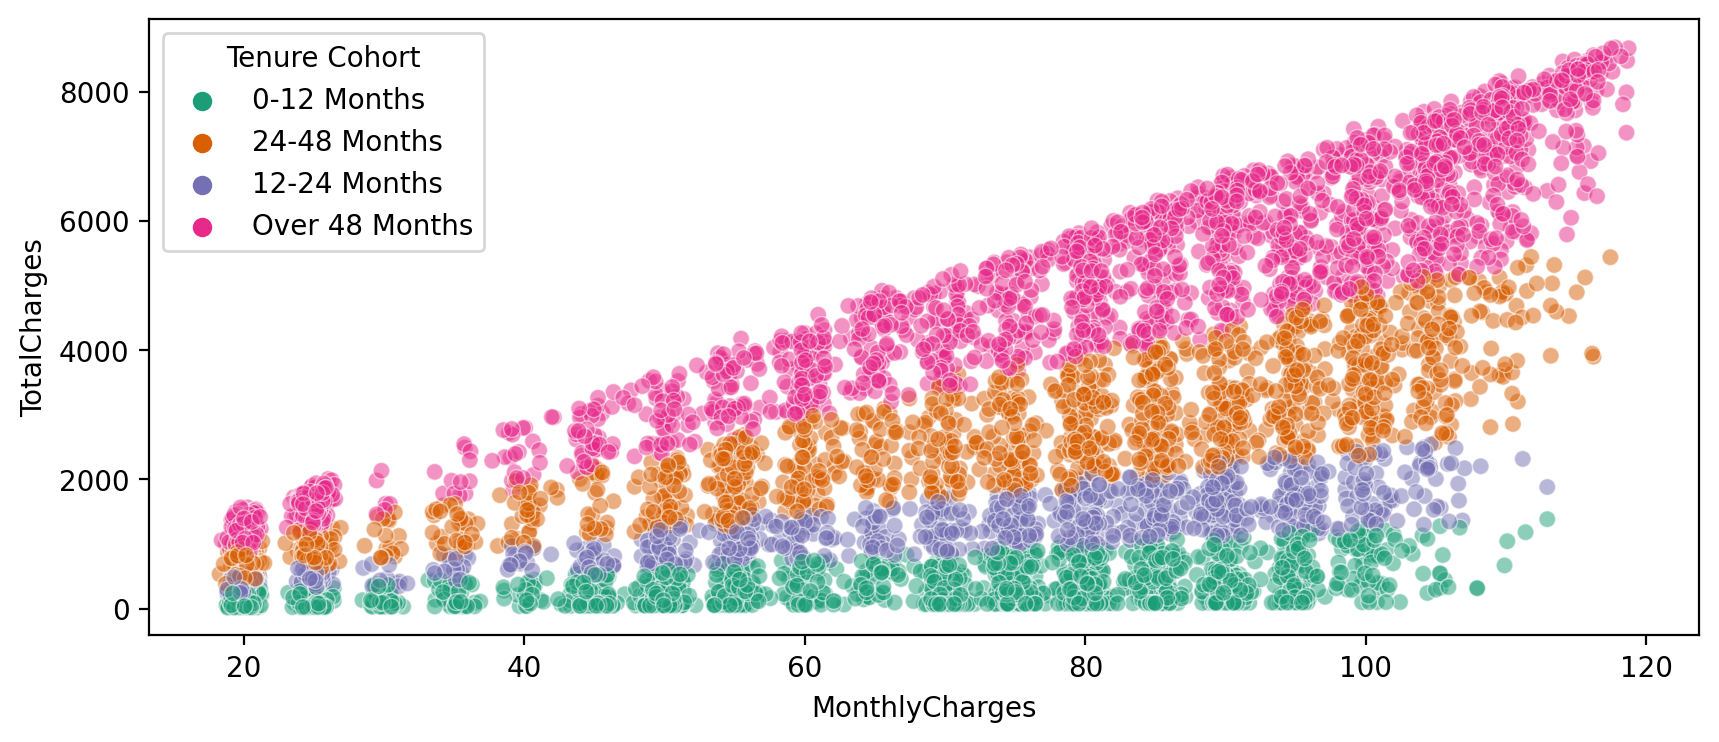

In [41]:
plt.figure(figsize=(10,4),dpi=200)
sns.scatterplot(data=df,x='MonthlyCharges',y='TotalCharges',hue='Tenure Cohort', linewidth=0.5,alpha=0.5,palette='Dark2')

<img src='fig10.png'>

**Задание: Постройте график countplot с количеством ушедших и не ушедших в отток людей в каждой когорте.**

In [42]:
# Напишите Ваш код в этой ячейке


<AxesSubplot:xlabel='Tenure Cohort', ylabel='count'>

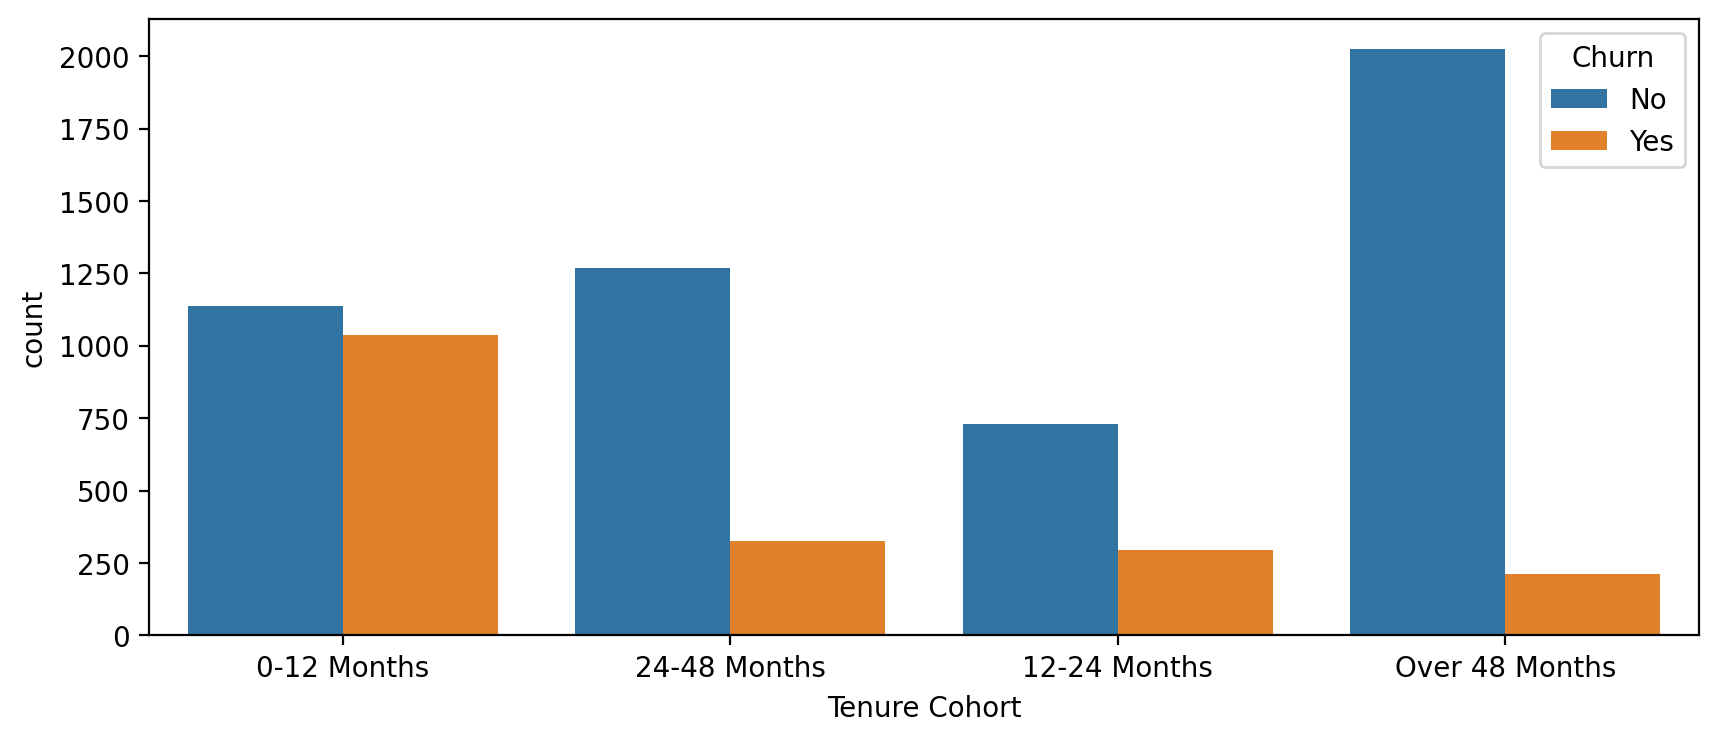

In [43]:
plt.figure(figsize=(10,4),dpi=200)
sns.countplot(data=df,x='Tenure Cohort',hue='Churn')

<img src='cplot.png'>

**Задание: Создайте набор графиков CountPlot с количеством людей по различным когортам Tenure Cohort. Для каждого типа контракта создайте отдельный график, и раскрасьте эти графики разными цветами по колонке Churn.**

In [44]:
# Напишите Ваш код в этой ячейке


<Figure size 2000x800 with 0 Axes>

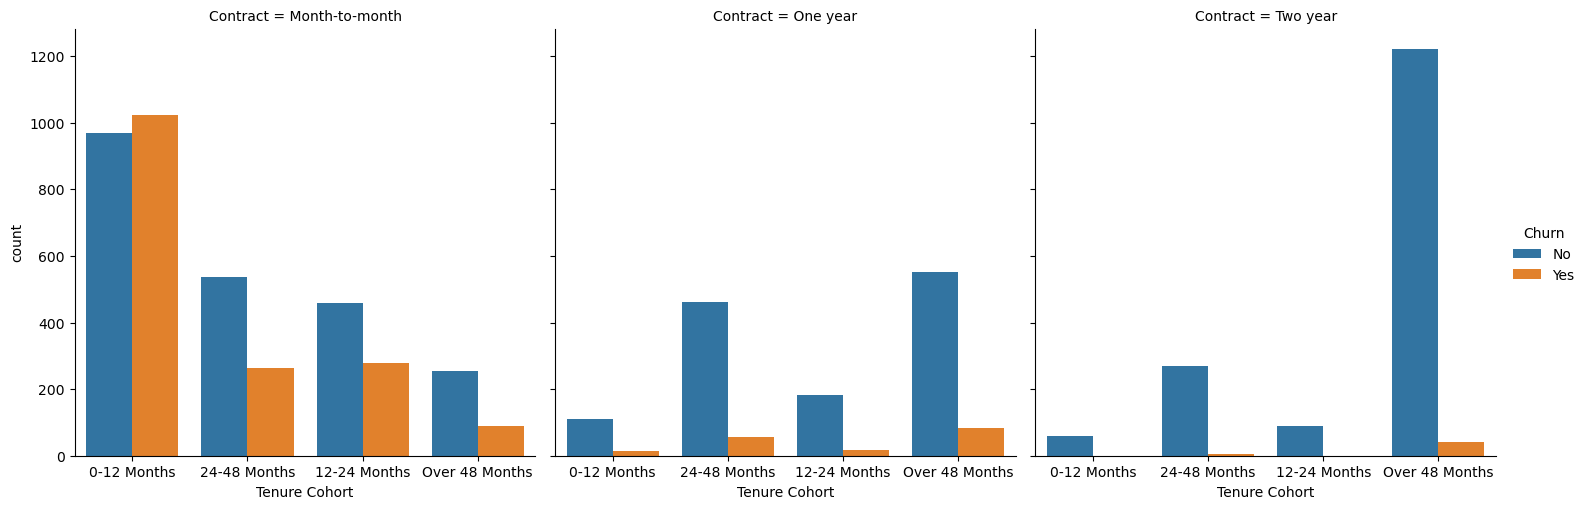

In [45]:
plt.figure(figsize=(10,4),dpi=200)
sns.catplot(data=df,x='Tenure Cohort',hue='Churn',col='Contract',kind='count')

<img src='fig11.png'>

-----

# Часть 4: Предиктивная модель

**Давайте исследуем 4 модели на основе деревьев: одно дерево решений, случайный лес, адаптивный бустинг и градиентный бустинг. При желании Вы можете дополнительно попробовать любые другие модели машинного обучения с учителем (supervised learning models) и сравнить результаты!**


## Одно дерево решений (Decision Tree)

**Задание: Разделите все данные на признаки X и целевую переменную Y. Создайте дамми-переменные, где это необходимо, а также посмотрите, есть ли какие-то признаки, которые можно было бы удалить.**

In [46]:
# Напишите Ваш код в этой ячейке


In [47]:
X = df.drop(['Churn','customerID'],axis=1)
X = pd.get_dummies(X,drop_first=True)

In [48]:
y = df['Churn']

**Задание: Выполните разбиение данных на обучающий и тестовый наборы (train test split), откладывая в сторону 10% данных для тестирования. В решениях мы используем random_state=101.**

In [49]:
# Напишите Ваш код в этой ячейке


In [50]:
from sklearn.model_selection import train_test_split

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

**Задание: Постройте модель Decision Tree и оцените её работу. Для этого выполните следующие шаги:**
   1. Обучите модель дерева решений (при желании можете выполнить поиск по сетке для поиска оптимальных значений гиперпараметров).
   2. Оцените метрики работы модели дерева решений - для этого выведите отчёт "classification report" и нарисуйте график с матрицей ошибок (confusion matrix).
   2. Посмотрите на важности признаков для получившегося дерева решений.
   4. Опционально: Нарисуйте график получившегося дерева. Обратите внимание, что если дерево получилось очень большим и Вы не выполняли усечение дерева с помощью параметров, то вызов метода plot_tree может привести к ошибке.

In [52]:
from sklearn.tree import DecisionTreeClassifier

In [53]:
dt = DecisionTreeClassifier(max_depth=6)

In [54]:
dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=6)

In [55]:
preds = dt.predict(X_test)

In [56]:
#  ВНИМАНИЕ! В будущих версиях Scikit-Learn поменяется синтаксис для следующих методов:
#  - вместо plot_confusion_matrix нужно будет использовать ConfusionMatrixDisplay.from_estimator или ConfusionMatrixDisplay.from_predictions.
#  - вместо plot_precision_recall_curve нужно будет использовать PrecisionRecallDisplay.from_estimator и PrecisionRecallDisplay.from_predictions
#  - вместо plot_roc_curve нужно будет использовать RocCurveDisplay.from_estimator и RocCurveDisplay.from_predictions
#
#from sklearn.metrics import accuracy_score,ConfusionMatrixDisplay,classification_report

from sklearn.metrics import accuracy_score,plot_confusion_matrix,classification_report

In [57]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

          No       0.87      0.89      0.88       557
         Yes       0.55      0.49      0.52       147

    accuracy                           0.81       704
   macro avg       0.71      0.69      0.70       704
weighted avg       0.80      0.81      0.80       704



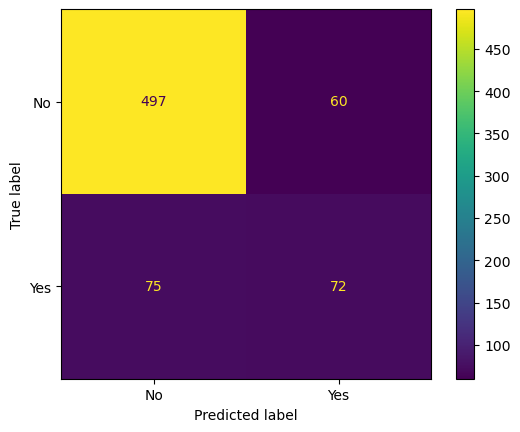

In [58]:
#ConfusionMatrixDisplay.from_estimator(dt,X_test,y_test)
plot_confusion_matrix(dt,X_test,y_test)

In [59]:
imp_feats = pd.DataFrame(data=dt.feature_importances_,index=X.columns,columns=['Feature Importance']).sort_values("Feature Importance")

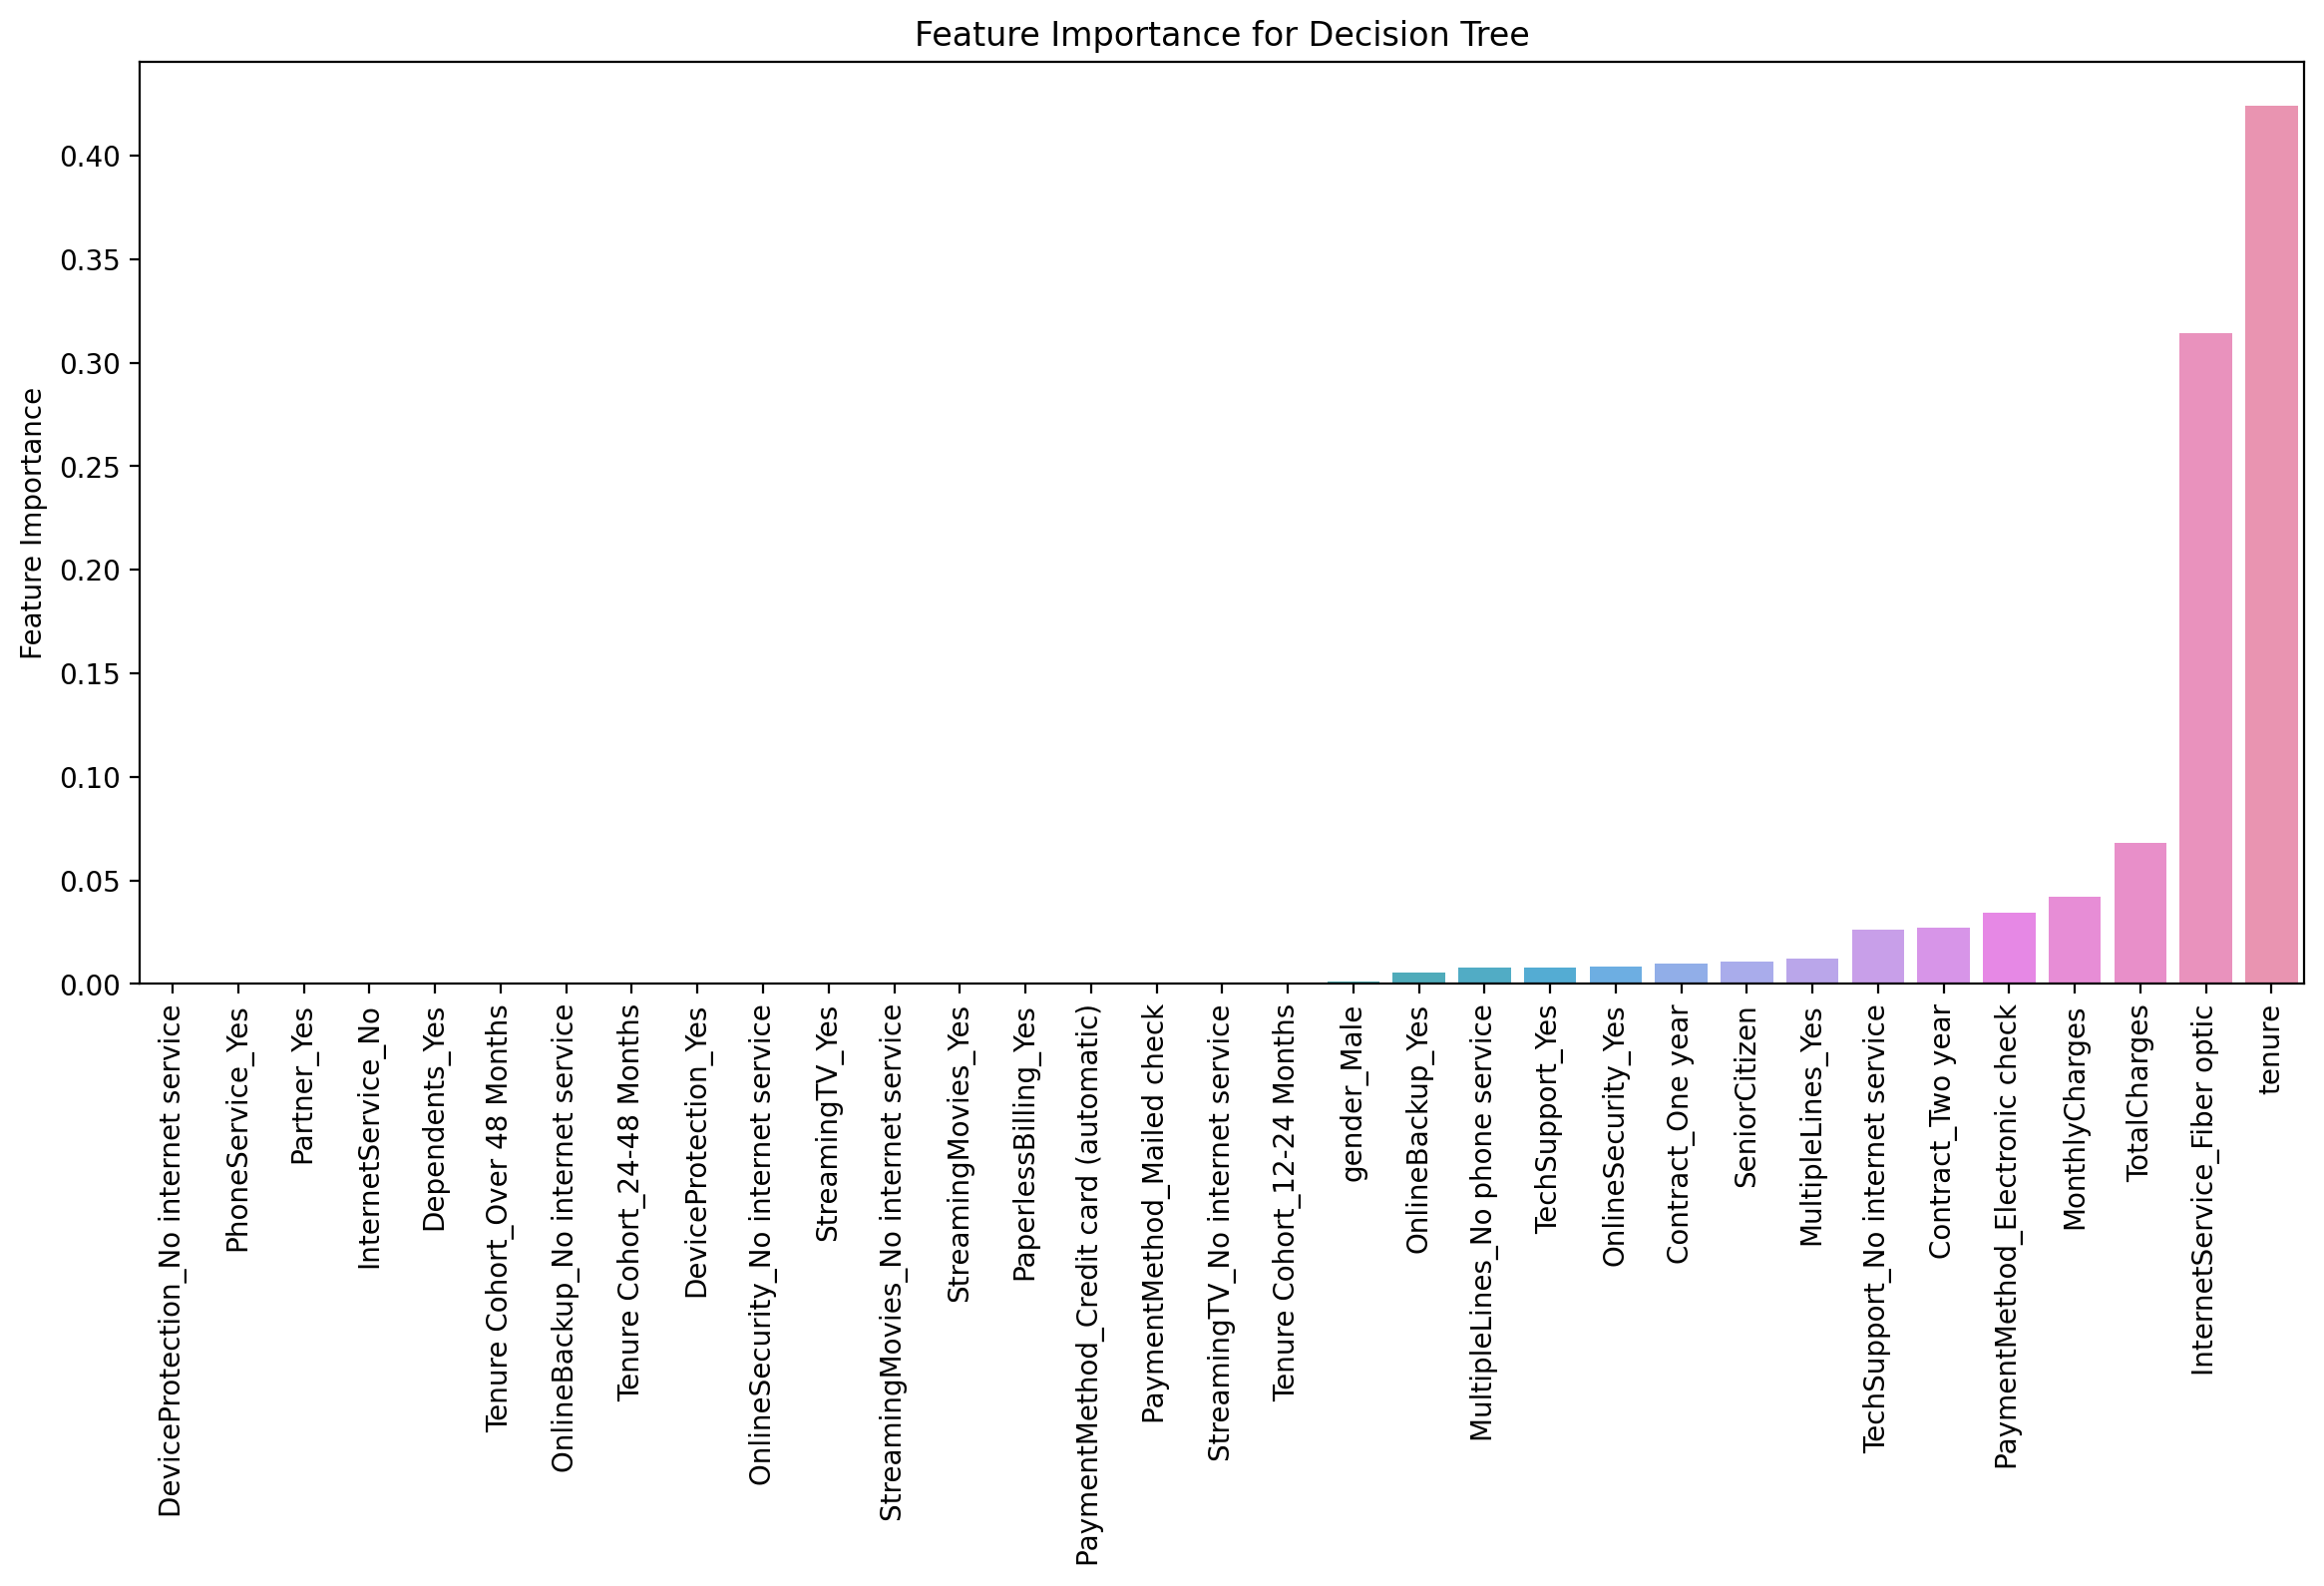

In [60]:
plt.figure(figsize=(14,6),dpi=200)
sns.barplot(data=imp_feats.sort_values('Feature Importance'),x=imp_feats.sort_values('Feature Importance').index,y='Feature Importance')
plt.xticks(rotation=90)
plt.title("Feature Importance for Decision Tree");

In [61]:
from sklearn.tree import plot_tree

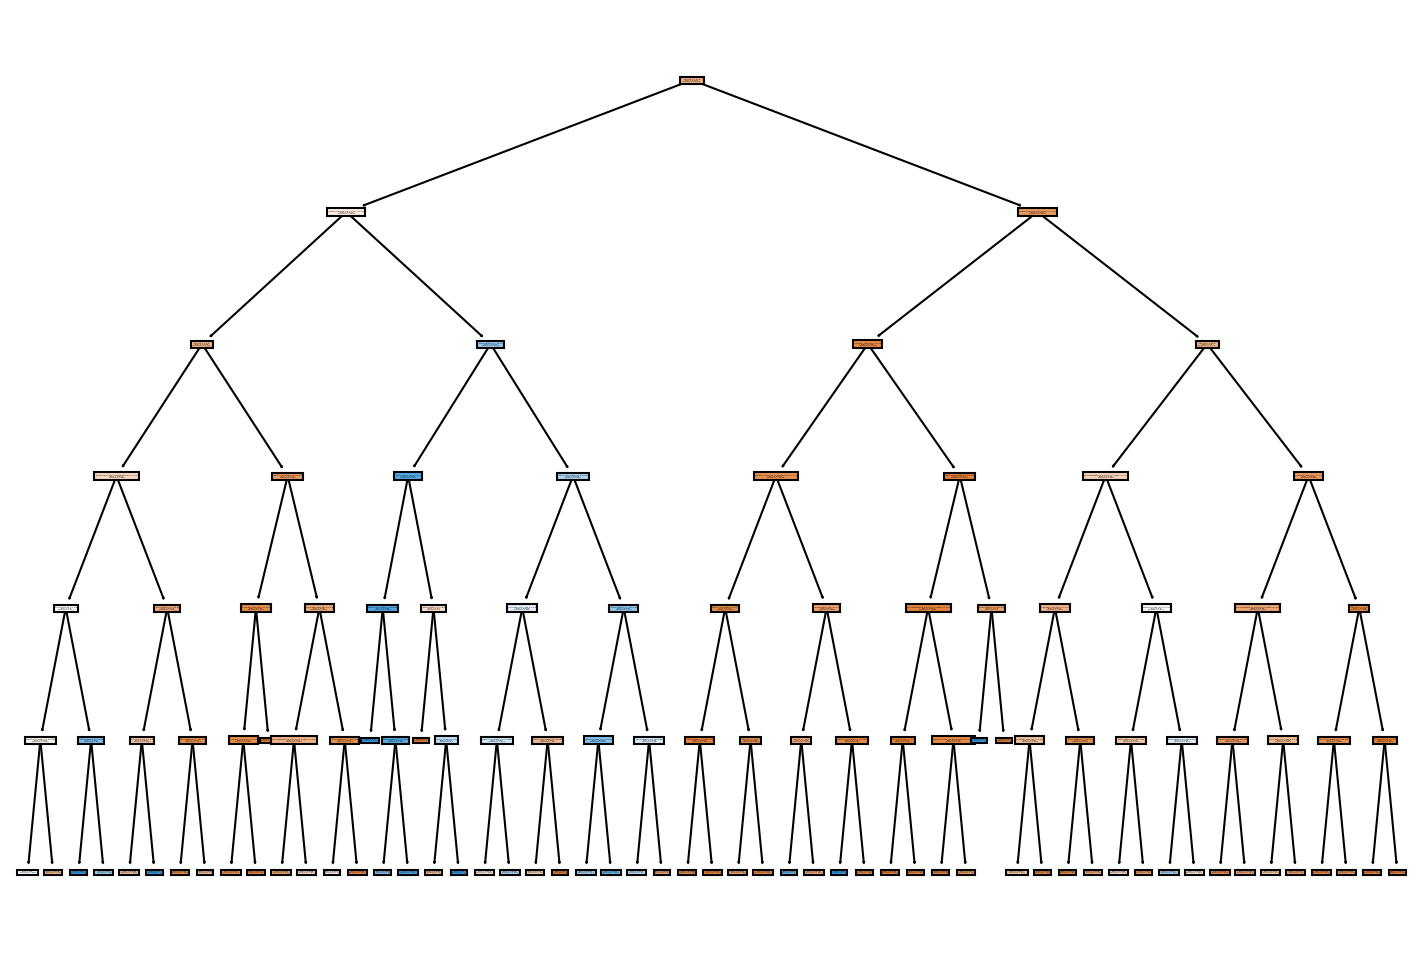

In [62]:
plt.figure(figsize=(12,8),dpi=150)
plot_tree(dt,filled=True,feature_names=X.columns);

<img src='hugetree.png'>

## Случайный лес (Random Forest)

**Задание: Создайте модель случайного леса, затем выведите отчёт "classification report" и матрицу ошибок для предсказанных результатов на тестовом наборе данных.**

In [63]:
# Напишите Ваш код в этой ячейке


In [64]:
from sklearn.ensemble import RandomForestClassifier

In [65]:
rf = RandomForestClassifier(n_estimators=100)

In [66]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [67]:
preds = rf.predict(X_test)

In [68]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

          No       0.86      0.88      0.87       557
         Yes       0.50      0.44      0.47       147

    accuracy                           0.79       704
   macro avg       0.68      0.66      0.67       704
weighted avg       0.78      0.79      0.79       704



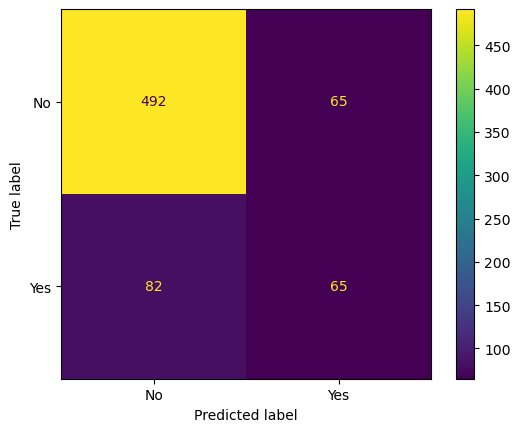

In [69]:
#ConfusionMatrixDisplay.from_estimator(rf,X_test,y_test)
plot_confusion_matrix(rf,X_test,y_test)

## Расширяемые деревья (Boosted Trees)

**Задание: Создайте модель AdaBoost или Gradient Boosting, затем выведите отчёт "classification report" и матрицу ошибок для предсказанных результатов на тестовом наборе данных.**

In [70]:
# Напишите Ваш код в этой ячейке


In [71]:
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier

In [72]:
ada_model = AdaBoostClassifier()

In [73]:
ada_model.fit(X_train,y_train)

AdaBoostClassifier()

In [74]:
preds = ada_model.predict(X_test)

In [75]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

          No       0.88      0.90      0.89       557
         Yes       0.60      0.54      0.57       147

    accuracy                           0.83       704
   macro avg       0.74      0.72      0.73       704
weighted avg       0.82      0.83      0.83       704



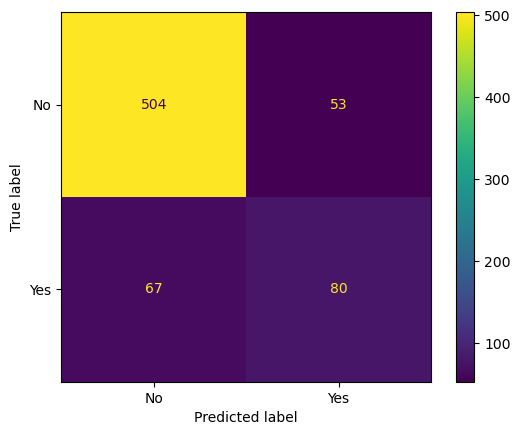

In [76]:
#ConfusionMatrixDisplay.from_estimator(ada_model,X_test,y_test)
plot_confusion_matrix(ada_model,X_test,y_test)

**Задания: Сравнивая результаты, какая модель у Вас работает лучше других?**

In [77]:
# У нас получились наилучшие результаты в модели AdaBoostClassifier, 
# однако надо сказать, что мы не выполняли поиск по сетке grid search,
# и целом модели показывали очень похожие результаты на этих данных.

### Отличная работа!